In [1]:
import pandas as pd
df = pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [2]:
dummies =  pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [3]:
merged = pd.concat([df,dummies], axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [4]:
final = merged.drop(['town','west windsor'], axis = 'columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [6]:
X = final.drop('price', axis = 'columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [7]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [8]:
model.fit(X,y)

LinearRegression()

In [9]:
model.predict([[2800,0,1]])

array([590775.63964739])

In [10]:
model.predict([[3400,0,0]])

array([681241.66845839])

In [11]:
model.score(X,y)

0.9573929037221873

## Exercise

In [12]:
df_ex = pd.read_csv("carprices.csv")
df_ex

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [13]:
import matplotlib.pyplot as plt

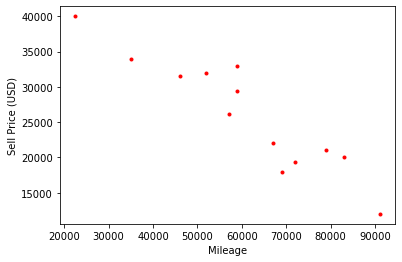

In [17]:
%matplotlib inline
plt.xlabel('Mileage')
plt.ylabel('Sell Price (USD)')
plt.scatter(df_ex.Mileage,df_ex[['Sell Price($)']],color='red', marker='.')

In [18]:
dummies_ex = pd.get_dummies(df_ex[['Car Model']])
dummies_ex

,Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [20]:
merged_ex = pd.concat([df_ex,dummies_ex],axis='columns')
merged_ex

,Car Model,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [22]:
final_ex = merged_ex.drop(['Car Model','Car Model_Audi A5'], axis = 'columns')
final_ex

,Mileage,Sell Price($),Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [31]:
model_ex = LinearRegression()
X = final_ex.drop(['Sell Price($)'], axis='columns')
y = final_ex['Sell Price($)']
X

,Mileage,Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [37]:
model_ex.fit(X,y)

56523.08523127495

In [39]:
model_ex.coef_

array([-3.70122094e-01, -1.33245363e+03, -4.28466659e+03,  2.45354074e+03])

In [40]:
model_ex.intercept_

56523.08523127495

In [42]:
model_ex.predict([[45000,4, 0,1]])

array([36991.31721061])

In [43]:
model_ex.predict([[86000,7,1,0]])

array([11080.74313219])

In [44]:
model_ex.score(X,y)

0.9417050937281082